In [2]:
#Features

#Age : age
#Job : type of job
#Marital : marital status
#Education : education
#Default: has credit in default? 
#Housing: has housing loan? 
#Loan: has personal loan?
#Contact: contact communication type
#Month: last contact month of year 
#Day_of_week: last contact day of the week 
#Duration: last contact duration, in seconds
#Campaign: number of contacts performed during this campaign and for this client
#Pdays: number of days that passed by after the client was last contacted from a previous campaign 
#Previous: number of contacts performed before this campaign and for this client 
#Poutcome: outcome of the previous marketing campaign
#Emp.var.rate: employment variation rate - quarterly indicator
#Cons.price.idx: consumer price index - monthly indicator
#Cons.conf.idx: consumer confidence index - monthly indicator 
#Euribor3m: euribor 3 month rate - daily indicator 
#Nr.employed: number of employees - quarterly indicator 
#y: has the client subscribed a term deposit?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [4]:
file_path = r'C:\Users\nitin\OneDrive\Documents\Python\ML Projects\Project 01 OTC Classification\bank-additional-full.csv'
data = pd.read_csv(file_path, sep=';')

In [5]:
print(data.head())
print(data.describe())
print(data.info())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93

In [6]:
data.isnull().sum().sort_values(ascending = False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

In [7]:
data = data.rename(columns={'housing':'housing_loan', 'loan':'personal_loan', 
                            'contact':'communication_type' , 'month' : 'Last_contact_month' ,
                            'marital': 'marital_status' , 'duration': 'last_contact_duration', 
                            'emp.var.rate': 'employment_variation_rate_quaterly' , 'cons.price.idx': 'consumer_price_index' ,
                            'cons.conf.idx' : 'consumer_confidence_index' , 'euribor3m': 'euribor_3_month_rate' ,
                            'nr.employed': 'no_of_emp_quarterly' , 'y' : 'terms_deposit'})

data.head()

,age,job,marital_status,education,default,housing_loan,personal_loan,communication_type,Last_contact_month,day_of_week,last_contact_duration,campaign,pdays,previous,poutcome,employment_variation_rate_quaterly,consumer_price_index,consumer_confidence_index,euribor_3_month_rate,no_of_emp_quarterly,terms_deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
def group_and_count(data):
    result={}
    for column in data.columns:
        group_count = data.groupby(column).size().reset_index(name= f'{column}_count')
        result[column] = group_count.sort_values(by=f'{column}_count', ascending = False)
    return result

grouped_count = group_and_count(data)

for column, group_count in grouped_count.items():
    print(f"column: {column}")
    print(group_count)
    

column: age
    age  age_count
14   31       1947
15   32       1846
16   33       1833
19   36       1780
18   35       1759
..  ...        ...
73   91          2
77   98          2
70   87          1
75   94          1
76   95          1

[78 rows x 2 columns]
column: job
              job  job_count
0          admin.      10422
1     blue-collar       9254
9      technician       6743
7        services       3969
4      management       2924
5         retired       1720
2    entrepreneur       1456
6   self-employed       1421
3       housemaid       1060
10     unemployed       1014
8         student        875
11        unknown        330
column: marital_status
  marital_status  marital_status_count
1        married                 24928
2         single                 11568
0       divorced                  4612
3        unknown                    80
column: education
             education  education_count
6    university.degree            12168
3          high.school          

In [9]:
data['education'].replace({'basic.9y': 'mid.school', 'basic.4y': 'mid.school', 'basic.6y': 'mid.school'}, inplace=True)


data['poutcome'].replace({'nonexistent': 0, 'failure': 0, 'success': 1}, inplace=True)

print(data['education'].value_counts())

print(data['poutcome'].value_counts())

education
mid.school             12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: count, dtype: int64
poutcome
0    39815
1     1373
Name: count, dtype: int64


In [10]:
data['pdays'] = data['pdays'].replace(999,0)

In [11]:
data = data.replace('unknown', np.nan)

def columns_groups(data):
    result={}
    for column in data.columns:
        group_count = data.groupby(column).size().reset_index(name= f'{column}_count')
        result[column] = group_count.sort_values(by=f'{column}_count', ascending = False)
    return result
columns_groupby = columns_groups(data)

for column, group_count in columns_groupby.items():
    print(f"column: {column}")
    print(group_count)
    

column: age
    age  age_count
14   31       1947
15   32       1846
16   33       1833
19   36       1780
18   35       1759
..  ...        ...
73   91          2
77   98          2
70   87          1
75   94          1
76   95          1

[78 rows x 2 columns]
column: job
              job  job_count
0          admin.      10422
1     blue-collar       9254
9      technician       6743
7        services       3969
4      management       2924
5         retired       1720
2    entrepreneur       1456
6   self-employed       1421
3       housemaid       1060
10     unemployed       1014
8         student        875
column: marital_status
  marital_status  marital_status_count
1        married                 24928
2         single                 11568
0       divorced                  4612
column: education
             education  education_count
2           mid.school            12513
4    university.degree            12168
0          high.school             9515
3  professional.cour

In [12]:
data.isnull().sum()

age                                      0
job                                    330
marital_status                          80
education                             1731
default                               8597
housing_loan                           990
personal_loan                          990
communication_type                       0
Last_contact_month                       0
day_of_week                              0
last_contact_duration                    0
campaign                                 0
pdays                                    0
previous                                 0
poutcome                                 0
employment_variation_rate_quaterly       0
consumer_price_index                     0
consumer_confidence_index                0
euribor_3_month_rate                     0
no_of_emp_quarterly                      0
terms_deposit                            0
dtype: int64

In [13]:
data.drop(['default'], axis=1, inplace=True)

In [14]:
data.columns.values

array(['age', 'job', 'marital_status', 'education', 'housing_loan',
       'personal_loan', 'communication_type', 'Last_contact_month',
       'day_of_week', 'last_contact_duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'employment_variation_rate_quaterly',
       'consumer_price_index', 'consumer_confidence_index',
       'euribor_3_month_rate', 'no_of_emp_quarterly', 'terms_deposit'],
      dtype=object)

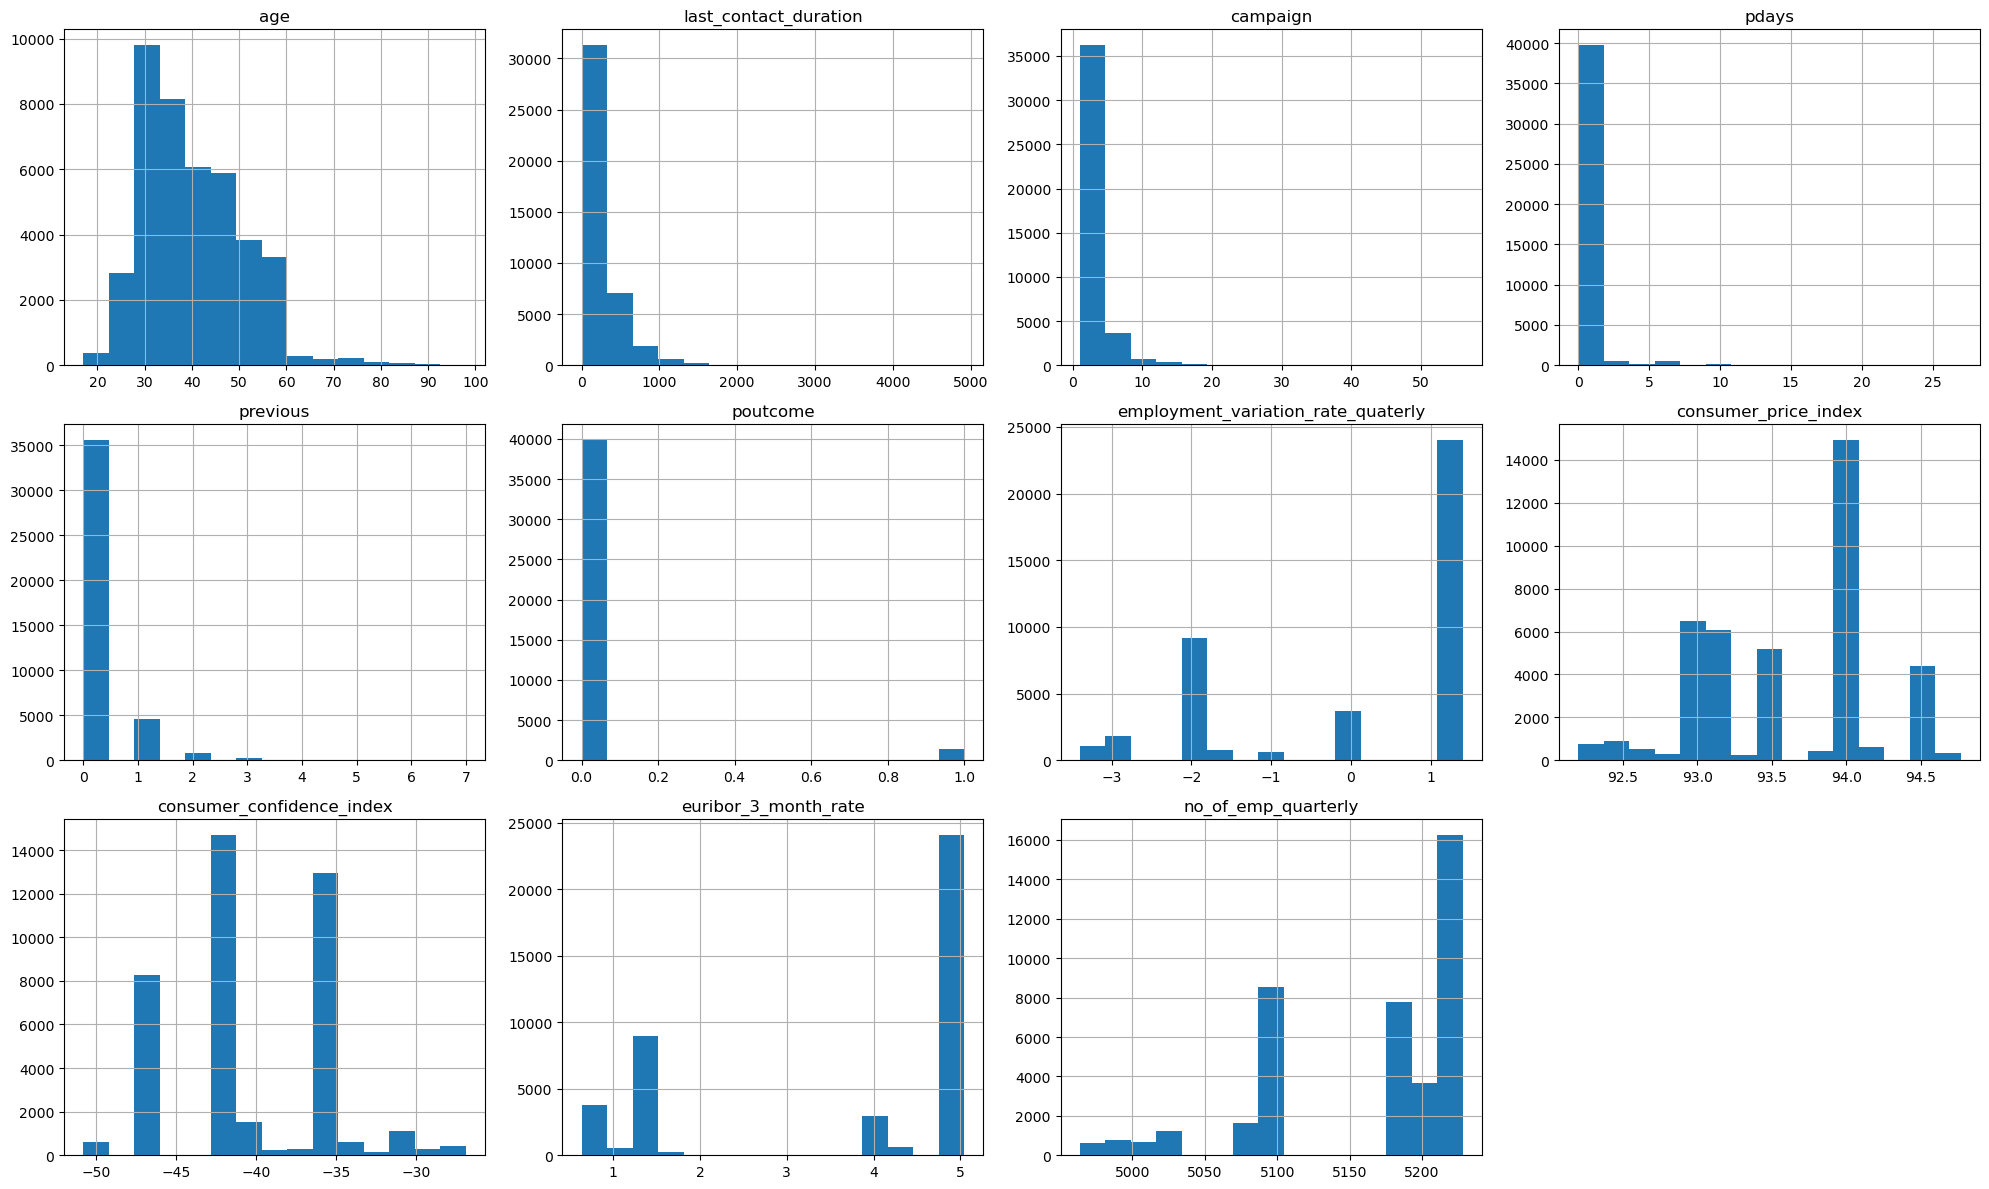

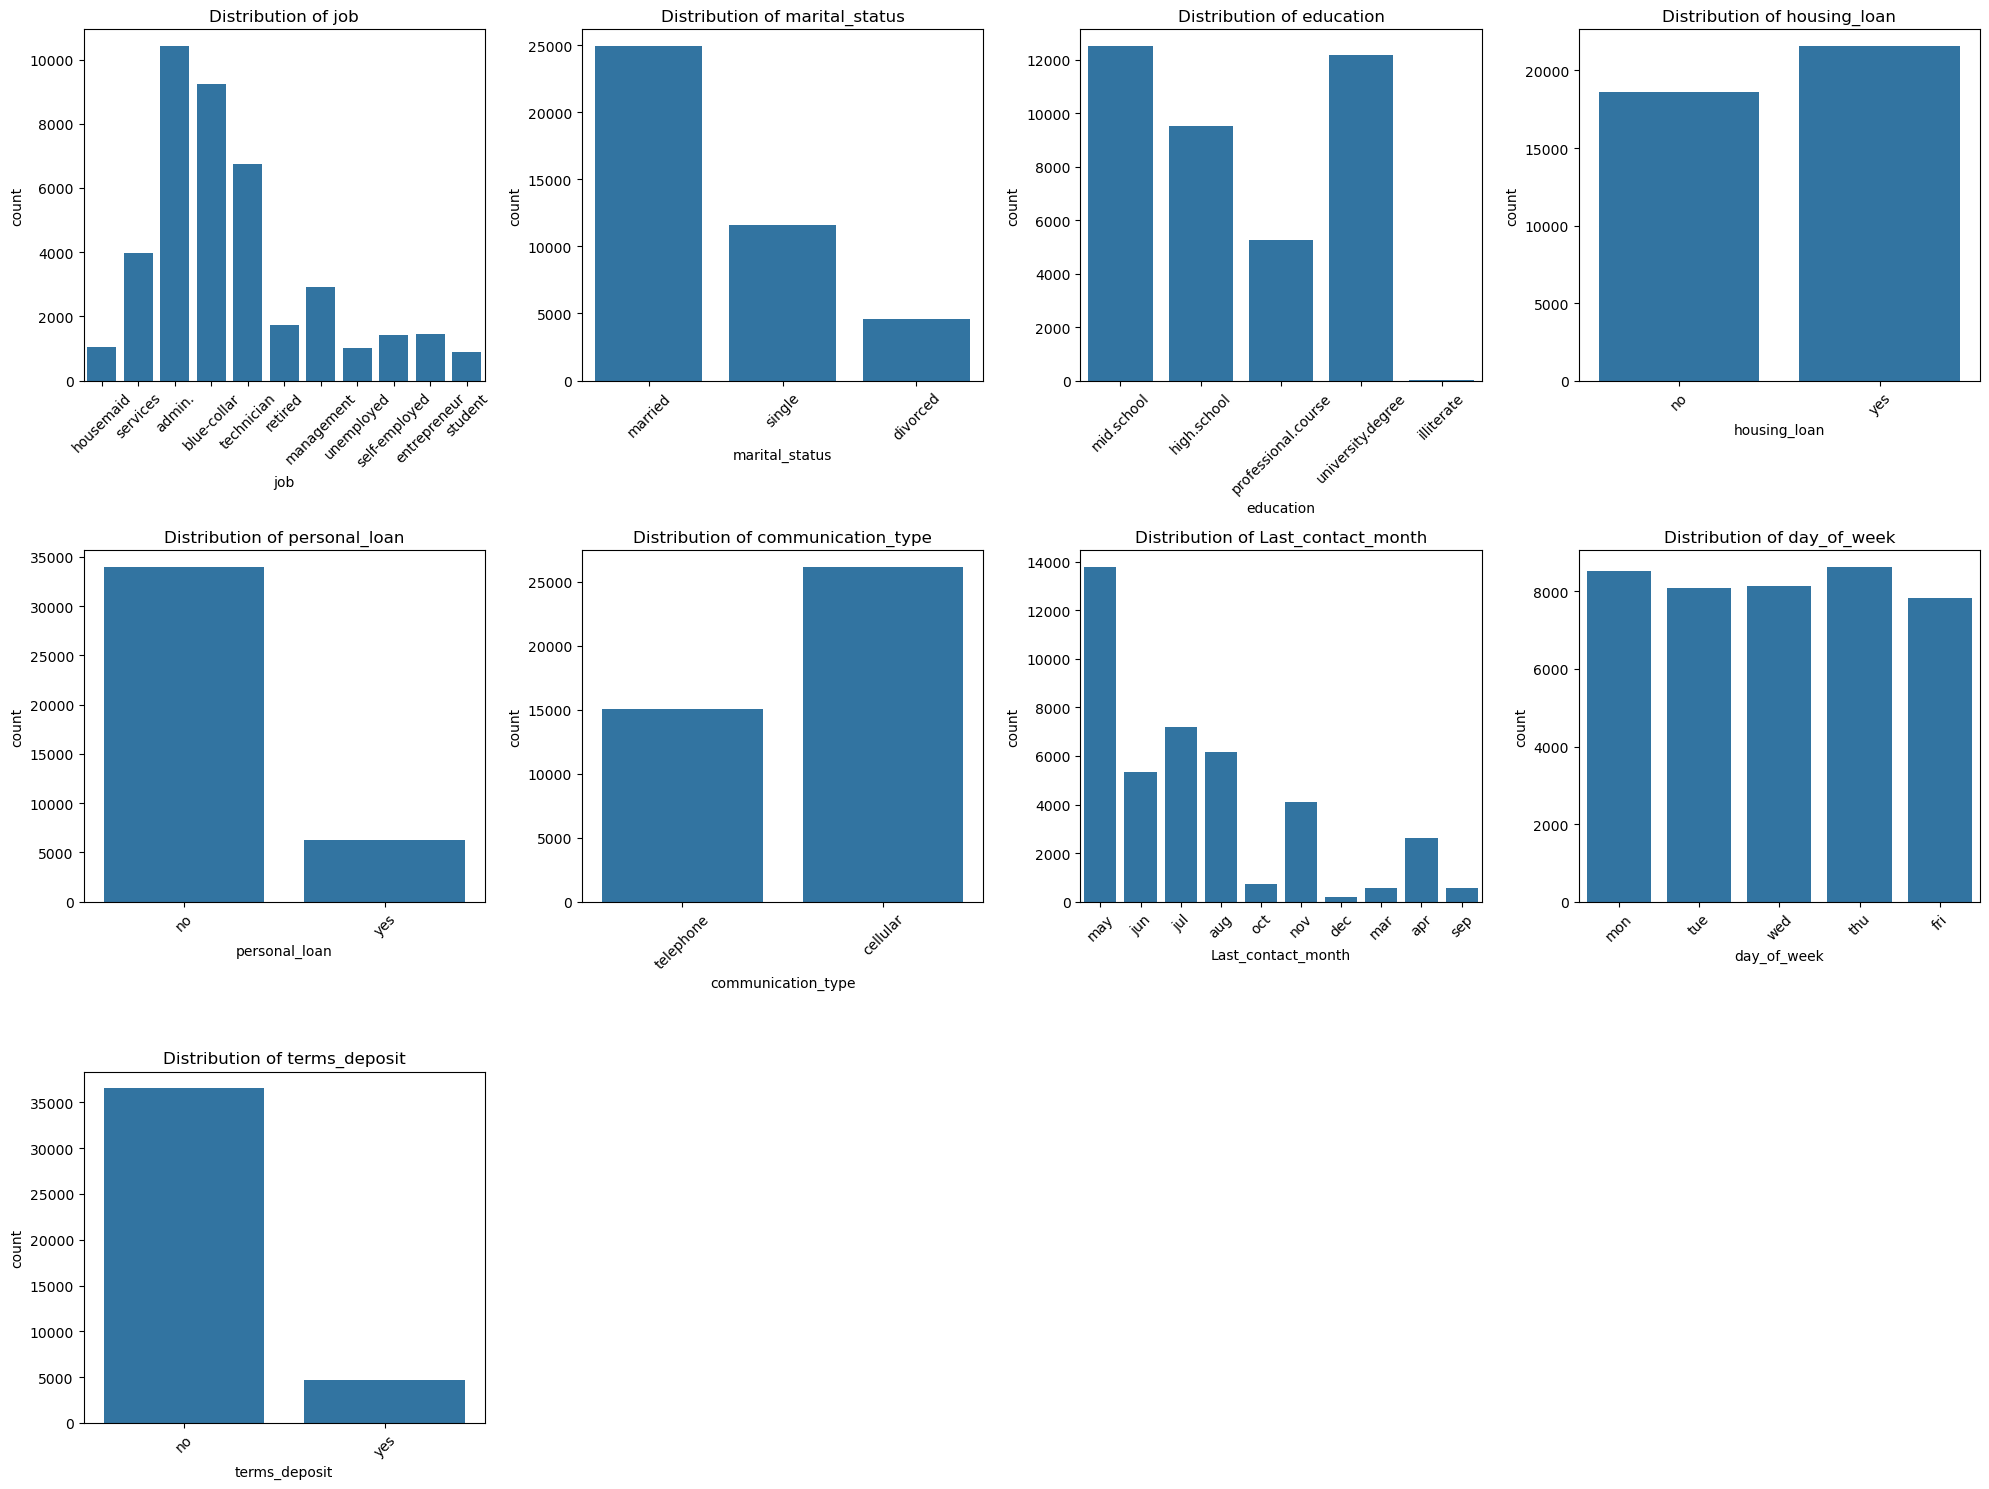

In [15]:
# Function to plot histograms for numerical columns
def plot_numerical_columns(data):
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
    num_cols = 4
    num_rows = (len(numerical_columns) + 3) // num_cols
    data[numerical_columns].hist(bins=15, figsize=(20, num_rows * 4), layout=(num_rows, 4))

    plt.tight_layout()
    plt.show()

# Function to plot count plots for categorical columns in a grid layout
def plot_categorical_columns(data):
    categorical_columns = data.select_dtypes(include=['object']).columns
    num_cols = 4
    num_rows = (len(categorical_columns) + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
    axes = axes.flatten()
    
    for i, column in enumerate(categorical_columns):
        sns.countplot(x=column, data=data, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


plot_numerical_columns(data)
plot_categorical_columns(data)

In [16]:
label_encoder_categories = ['job','education','Last_contact_month','day_of_week','terms_deposit']

onehot_encoder_categories = ['marital_status','housing_loan','personal_loan','communication_type']

numerical_columns = ['age','last_contact_duration','campaign','pdays','previous','poutcome',
                     'employment_variation_rate_quaterly','consumer_price_index','consumer_confidence_index',
                     'euribor_3_month_rate','no_of_emp_quarterly']

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
 
# Step 1: Encode categorical features
onehot_encoder = OneHotEncoder(sparse_output=False)
encoded_categorical = onehot_encoder.fit_transform(data[onehot_encoder_categories])
 
# Get the feature names after one-hot encoding
onehot_feature_names = []
for i, column in enumerate(onehot_encoder_categories):
    unique_values = data[column].unique()
    for value in unique_values:
        onehot_feature_names.append(f"{column}_{value}")
 
# Step 2: Impute missing values and scale numerical features
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
 
imputed_scaled_numerical = scaler.fit_transform(imputer.fit_transform(data[numerical_columns]))
 
# Step 3: Combine encoded categorical and scaled numerical features
transformed_data = pd.concat([pd.DataFrame(encoded_categorical, columns=onehot_feature_names),
                              pd.DataFrame(imputed_scaled_numerical, columns=numerical_columns)],
                             axis=1)


In [18]:
encoded_df = pd.DataFrame()

label_encoder = LabelEncoder()

for column in label_encoder_categories:
    # Convert all numeric values to strings
    data[column] = data[column].astype(str)
    
    # Instantiate LabelEncoder
    label_encoder = LabelEncoder()
    
    # Encode the column
    encoded_column = label_encoder.fit_transform(data[column])
    
    # Update the DataFrame with the encoded column
    encoded_df[column + '_encoded'] = encoded_column


transformed_data = pd.concat([transformed_data, encoded_df], axis=1)

In [19]:
#Using One-Hot Encoding and Label Encoding to convert categorical features into numerical format.
#Handling missing values and scale numerical features to standardize them.
#Combining the encoded categorical features, scaled numerical features, and label encoded features into a single DataFrame.

transformed_data

,marital_status_married,marital_status_single,marital_status_divorced,marital_status_nan,housing_loan_no,housing_loan_yes,housing_loan_nan,personal_loan_no,personal_loan_yes,personal_loan_nan,communication_type_telephone,communication_type_cellular,age,last_contact_duration,campaign,pdays,previous,poutcome,employment_variation_rate_quaterly,consumer_price_index,consumer_confidence_index,euribor_3_month_rate,no_of_emp_quarterly,job_encoded,education_encoded,Last_contact_month_encoded,day_of_week_encoded,terms_deposit_encoded
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.533034,0.010471,-0.565922,-0.164012,-0.349494,-0.1857,0.648092,0.722722,0.886447,0.712460,0.331680,3,2,6,1,0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.628993,-0.421501,-0.565922,-0.164012,-0.349494,-0.1857,0.648092,0.722722,0.886447,0.712460,0.331680,8,0,6,1,0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.290186,-0.124520,-0.565922,-0.164012,-0.349494,-0.1857,0.648092,0.722722,0.886447,0.712460,0.331680,8,0,6,1,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.002309,-0.413787,-0.565922,-0.164012,-0.349494,-0.1857,0.648092,0.722722,0.886447,0.712460,0.331680,0,2,6,1,0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.533034,0.187888,-0.565922,-0.164012,-0.349494,-0.1857,0.648092,0.722722,0.886447,0.712460,0.331680,8,0,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3.164336,0.292025,-0.565922,-0.164012,-0.349494,-0.1857,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,6,4,7,0,1
41184,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.573445,0.481012,-0.565922,-0.164012,-0.349494,-0.1857,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1,4,7,0,0
41185,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.533034,-0.267225,-0.204909,-0.164012,-0.349494,-0.1857,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,6,5,7,0,0
41186,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.381527,0.708569,-0.565922,-0.164012,-0.349494,-0.1857,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,10,4,7,0,1


In [20]:
# Measuring how other features correlate with dependent variable

transformed_data.drop('terms_deposit_encoded', axis=1).corrwith(transformed_data['terms_deposit_encoded']).round(2)

marital_status_married               -0.01
marital_status_single                -0.04
marital_status_divorced               0.05
marital_status_nan                    0.01
housing_loan_no                      -0.01
housing_loan_yes                      0.01
housing_loan_nan                     -0.00
personal_loan_no                      0.01
personal_loan_yes                    -0.00
personal_loan_nan                    -0.00
communication_type_telephone          0.14
communication_type_cellular          -0.14
age                                   0.03
last_contact_duration                 0.41
campaign                             -0.07
pdays                                 0.27
previous                              0.23
poutcome                              0.32
employment_variation_rate_quaterly   -0.30
consumer_price_index                 -0.14
consumer_confidence_index             0.05
euribor_3_month_rate                 -0.31
no_of_emp_quarterly                  -0.35
job_encoded

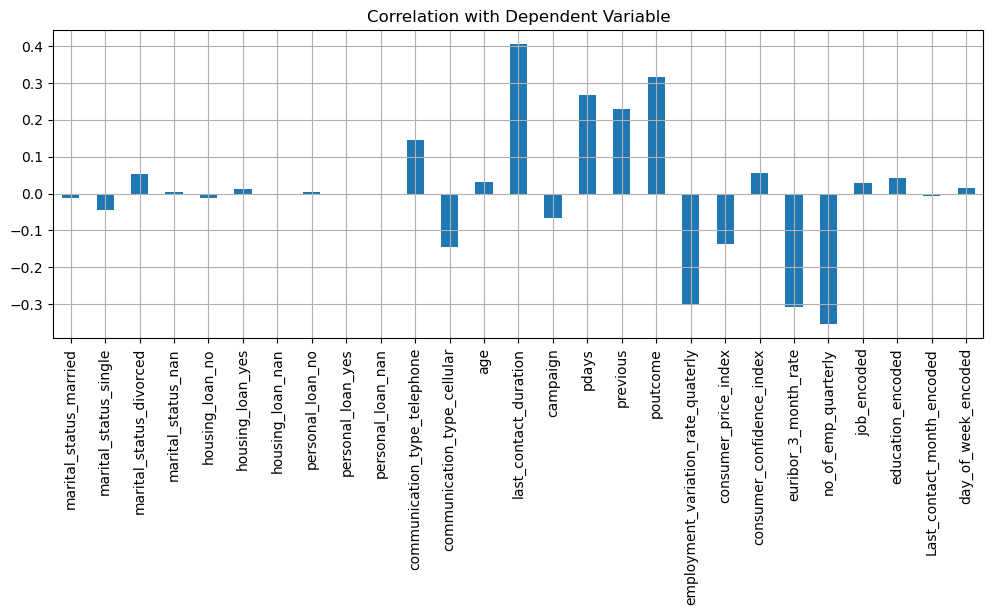

In [21]:
transformed_data.drop('terms_deposit_encoded', axis=1).corrwith(transformed_data['terms_deposit_encoded']).plot(
    kind='bar', figsize=(12, 4), title='Correlation with Dependent Variable', grid=True)

plt.show()

In [22]:
from sklearn.model_selection import train_test_split

X = transformed_data.drop(columns=['terms_deposit_encoded'])
y = transformed_data['terms_deposit_encoded']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Spliting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=0)


Classifier: Logistic Regression
Training Accuracy: 0.91
Test Accuracy: 0.92
Cross-Validation Mean Accuracy: 0.91
Confusion Matrix:
[[7135  184]
 [ 507  412]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7319
           1       0.69      0.45      0.54       919

    accuracy                           0.92      8238
   macro avg       0.81      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238

Classifier: K-Nearest Neighbors
Training Accuracy: 0.92
Test Accuracy: 0.90
Cross-Validation Mean Accuracy: 0.90
Confusion Matrix:
[[7053  266]
 [ 540  379]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7319
           1       0.59      0.41      0.48       919

    accuracy                           0.90      8238
   macro avg       0.76      0.69      0.72      8238
weighted avg       0.89      0.90      

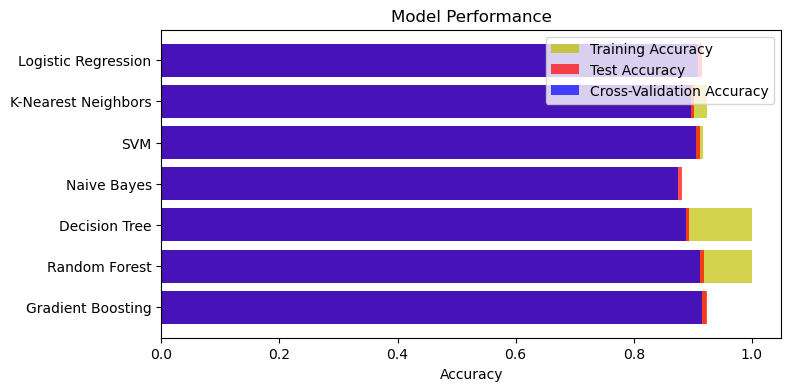

In [23]:
#Training: Fitting each classifier to the training data and calculating the training accuracy.
#Testing: Evaluating each classifier on the test data and calculating the test accuracy.
#Cross-Validation: Using 5-fold cross-validation to calculating mean accuracy scores for more reliable performance estimates.
#Metrics and Plots: Printing confusion matrices and classification reports for each classifier and ploting the accuracies for easy comparison.

#Importing functions to evaluate model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Model-Selection
from sklearn.model_selection import cross_val_score, KFold

#Classification Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("SVM", SVC()),
    ("Naive Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier())
]

#Adding lists which store the accuracy scores for training, testing, and cross-validation for each classifier
train_score = []
test_score = []
cross_val_scores_list = []


for name, classifier in classifiers:
    classifier.fit(X_train, y_train)


    #Training
    train_pred = classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_score.append(train_accuracy)

    #testing
    test_pred = classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_score.append(test_accuracy)

    # Cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=kfold, scoring='accuracy')
    cross_val_scores_list.append(np.mean(cv_scores))


    print(f"Classifier: {name}")
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print(f"Cross-Validation Mean Accuracy: {np.mean(cv_scores):.2f}")
    print(f"Confusion Matrix:")
    print(confusion_matrix(y_test, test_pred))
    print("Classification Report:")
    print(classification_report(y_test, test_pred))
    print("=" *50)

#Plotting
plt.figure(figsize=(8, 4))
plt.barh([name for name, _ in classifiers], train_score, color='y', alpha=0.7, label='Training Accuracy')
plt.barh([name for name, _ in classifiers], test_score, color='r', alpha=0.7, label='Test Accuracy')
plt.barh([name for name, _ in classifiers], cross_val_scores_list, color='b', alpha=0.7, label='Cross-Validation Accuracy')
plt.xlabel('Accuracy')
plt.title('Model Performance')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

In [24]:
#For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score, roc_curve
from pprint import pprint

# Defining parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=20, stop=200, num=5)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(1, 45, num=3)],
    'min_samples_split': [5, 10]
}

print("Parameter grid for Gradient Boosting:")
pprint(param_grid)


#Defining the range of hyperparameters for the Gradient Boosting classifier to tune.
#n_estimators: The number of boosting stages to be run (20 to 200 in 5 steps).
#max_features: The number of features to consider when looking for the best split (auto, sqrt).
#max_depth: The maximum depth of the individual estimators (1 to 45 in 3 steps).
#min_samples_split: The minimum number of samples required to split an internal node (5, 10).

Parameter grid for Gradient Boosting:
{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [25]:
#estimator: GradientBoostingClassifier
#param_grid: defining hyperparameter
#cv: Number of cross-validation folds
#verbose: Controls the verbosity of the output
#n_jobs: Number of jobs to run in parallel

gb = GradientBoostingClassifier(random_state=42)

gb_grid = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, verbose=2, n_jobs=4)

In [26]:
gb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=4,
             param_grid={'max_depth': [1, 23, 45],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [5, 10],
                         'n_estimators': [20, 65, 110, 155, 200]},
             verbose=2)

In [27]:
#Retrieving the best hyperparameters found by GridSearchCV.

best_params = gb_grid.best_params_
print("Best parameters found by GridSearchCV:")
pprint(best_params)

Best parameters found by GridSearchCV:
{'max_depth': 45,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 155}


In [28]:
#Training a new instance of the Gradient Boosting classifier using the best hyperparameters

best_gb = GradientBoostingClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)
best_gb.fit(X_train, y_train)

y_pred = best_gb.predict(X_test)

#Accuracy: Measuring the proportion of correctly classified instances
print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'.format(best_gb.score(X_test, y_test)))

Accuracy of Gradient Boosting classifier on test set: 0.92


In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[7060  259]
 [ 417  502]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7319
           1       0.66      0.55      0.60       919

    accuracy                           0.92      8238
   macro avg       0.80      0.76      0.78      8238
weighted avg       0.91      0.92      0.91      8238



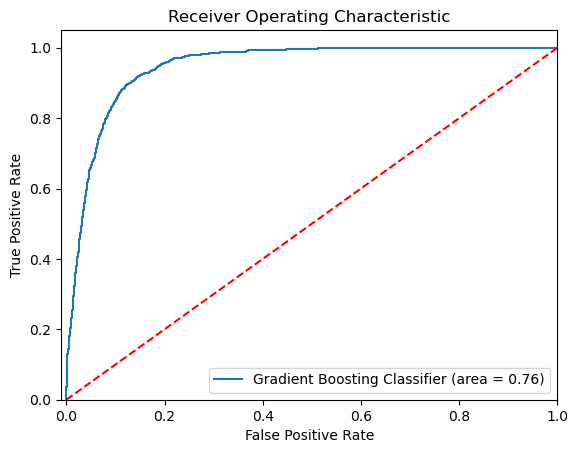

In [30]:
#roc_auc_score - Computing the Area Under the ROC Curve
#roc_curve - Computing the ROC curve values (false positive rate, true positive rate).

roc_auc = roc_auc_score(y_test, best_gb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, best_gb.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting Classifier (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#The ROC curve provides a graphical representation of the classifier's performance, showing the trade-off between sensitivity (true positive rate) and specificity (1 - false positive rate).

#Interpretation:
    #An AUC score of 0.76 indicates that the Gradient Boosting classifier has a good ability to distinguish between positive and negative classes.
    #The ROC curve is significantly above the diagonal, which indicates that the model is performing better than random guessing.
    #The curve shows a good balance between sensitivity (TPR) and specificity (1 - FPR), especially at lower FPR values.

In [64]:
import pickle

# Saving the model
filename = 'Defaulters_prediction.pickle'
with open(filename, 'wb') as file:
    pickle.dump(best_gb, file)
